In [137]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [138]:
data = pd.read_csv('data/mnist_train.csv')

Wczytanie zbioru danych MNIST.

In [139]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Przemieszanie i podzielenie danych wejściowych na zestaw walidacyjny oraz treningowy.

In [140]:
X_train[:, 0].shape

(784,)

In [141]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLu(Z):
    return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

Algorytm sieci neuronowych zawierający inicjalizacje parametrów, propagację w przód, one-hot encoding etykiet i propagację wstecz i aktualizacje wag.

In [142]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

Trening modelu poprzez algorytm iteracji parametrów w celu zmiejszenia błedu poprawy przewidywań, uaktualniania parametrów oraz śledzenia postępów uczenia się oraz precyzji.

In [143]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 1 9 ... 9 9 9] [6 3 0 ... 2 6 7]
0.13845762711864407
Iteration:  10
[8 3 0 ... 8 9 8] [6 3 0 ... 2 6 7]
0.21272881355932202
Iteration:  20
[8 3 0 ... 8 9 6] [6 3 0 ... 2 6 7]
0.3426610169491525
Iteration:  30
[6 3 0 ... 8 9 6] [6 3 0 ... 2 6 7]
0.43466101694915255
Iteration:  40
[6 3 0 ... 8 9 9] [6 3 0 ... 2 6 7]
0.5018983050847458
Iteration:  50
[6 3 0 ... 2 9 9] [6 3 0 ... 2 6 7]
0.5556101694915254
Iteration:  60
[6 3 0 ... 2 9 9] [6 3 0 ... 2 6 7]
0.5987457627118644
Iteration:  70
[6 3 0 ... 2 9 9] [6 3 0 ... 2 6 7]
0.6335762711864407
Iteration:  80
[6 3 0 ... 2 4 9] [6 3 0 ... 2 6 7]
0.6618813559322034
Iteration:  90
[6 3 0 ... 2 4 9] [6 3 0 ... 2 6 7]
0.6837118644067797
Iteration:  100
[6 3 0 ... 2 4 9] [6 3 0 ... 2 6 7]
0.7007118644067797
Iteration:  110
[6 3 0 ... 2 4 9] [6 3 0 ... 2 6 7]
0.7148474576271187
Iteration:  120
[6 3 0 ... 2 4 9] [6 3 0 ... 2 6 7]
0.7271186440677966
Iteration:  130
[6 3 0 ... 2 4 9] [6 3 0 ... 2 6 7]
0.7385084745762712
Iteration:  14

In [144]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Testowanie modelu na pojedyńczych przykładach oraz ich wizualizacja.

Prediction:  [7]
Label:  7


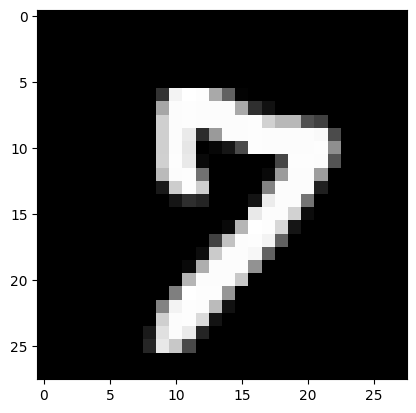

Prediction:  [8]
Label:  8


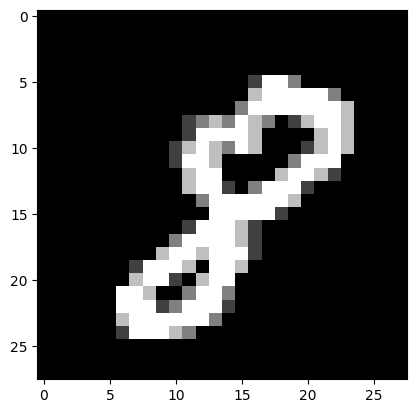

Prediction:  [2]
Label:  2


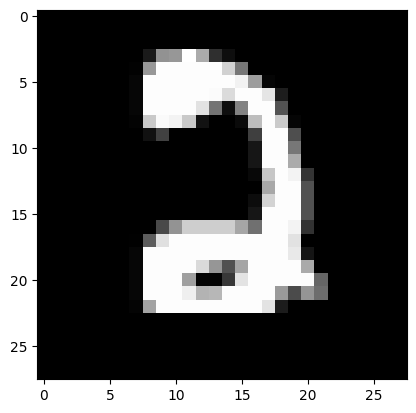

In [149]:
test_prediction(6, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(50, W1, b1, W2, b2)

Ciekawostka:
"Garbage in, garbage out"
Jeśli dane wejściowe (i etykiety) są błędne, model będzie również generować błędne wyniki.